<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/NN/churn_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and get dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Churn_Modelling.csv")


# Basic Data exploration


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
dataset.isnull().sum() # no null values - No missing data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
dataset.info() # concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
dataset.shape # 1000 rows and 14 columns

(10000, 14)

In [12]:
dataset.duplicated().sum() # no duplicated rows

0

In [13]:
dataset.select_dtypes(include='object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [14]:
dataset.select_dtypes(include='object').columns # Categorical column names

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [15]:
dataset.select_dtypes(include='number')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


# Data visualization and distribution

### Correlation matrix for `numerical columns`

In [16]:
corr_matrix = dataset.select_dtypes(include='number').corr()
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


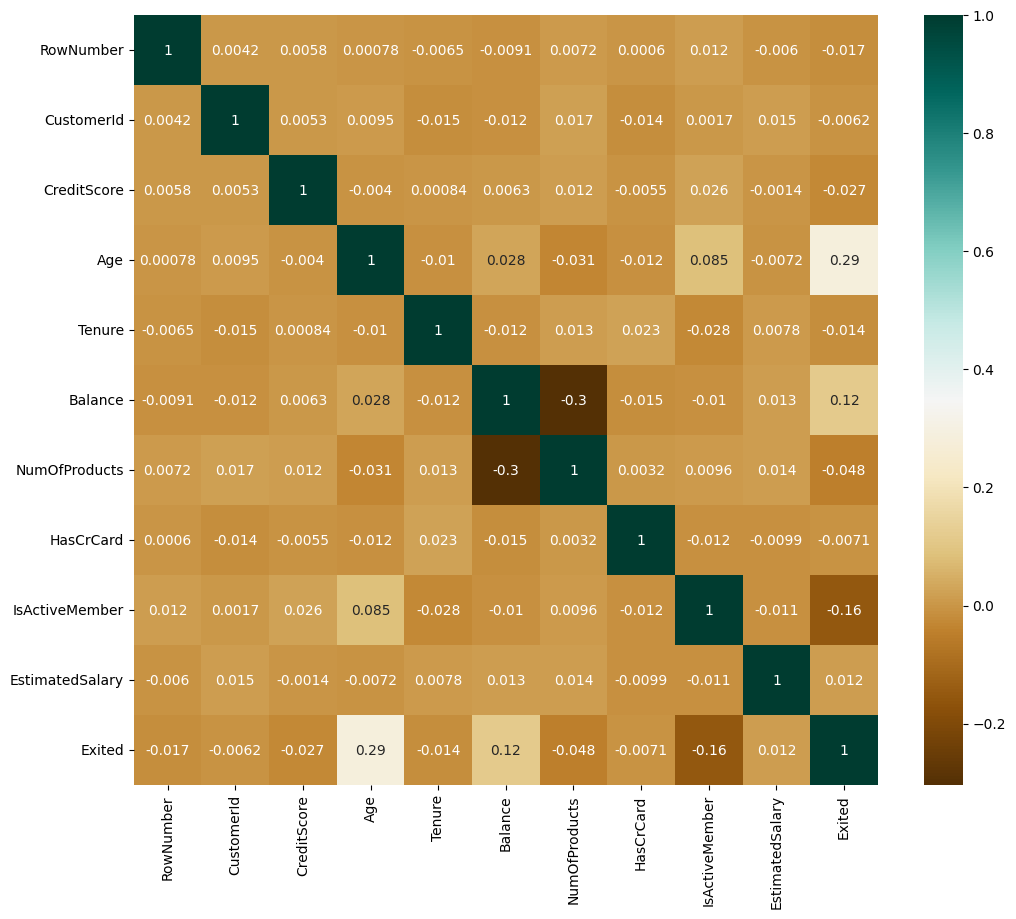

In [17]:
plt.figure(figsize=(12, 10)) # change the width and height
sns.heatmap(corr_matrix, annot=True, cmap='BrBG') # other cmap options - magma, veridis , coolwarm
plt.show()

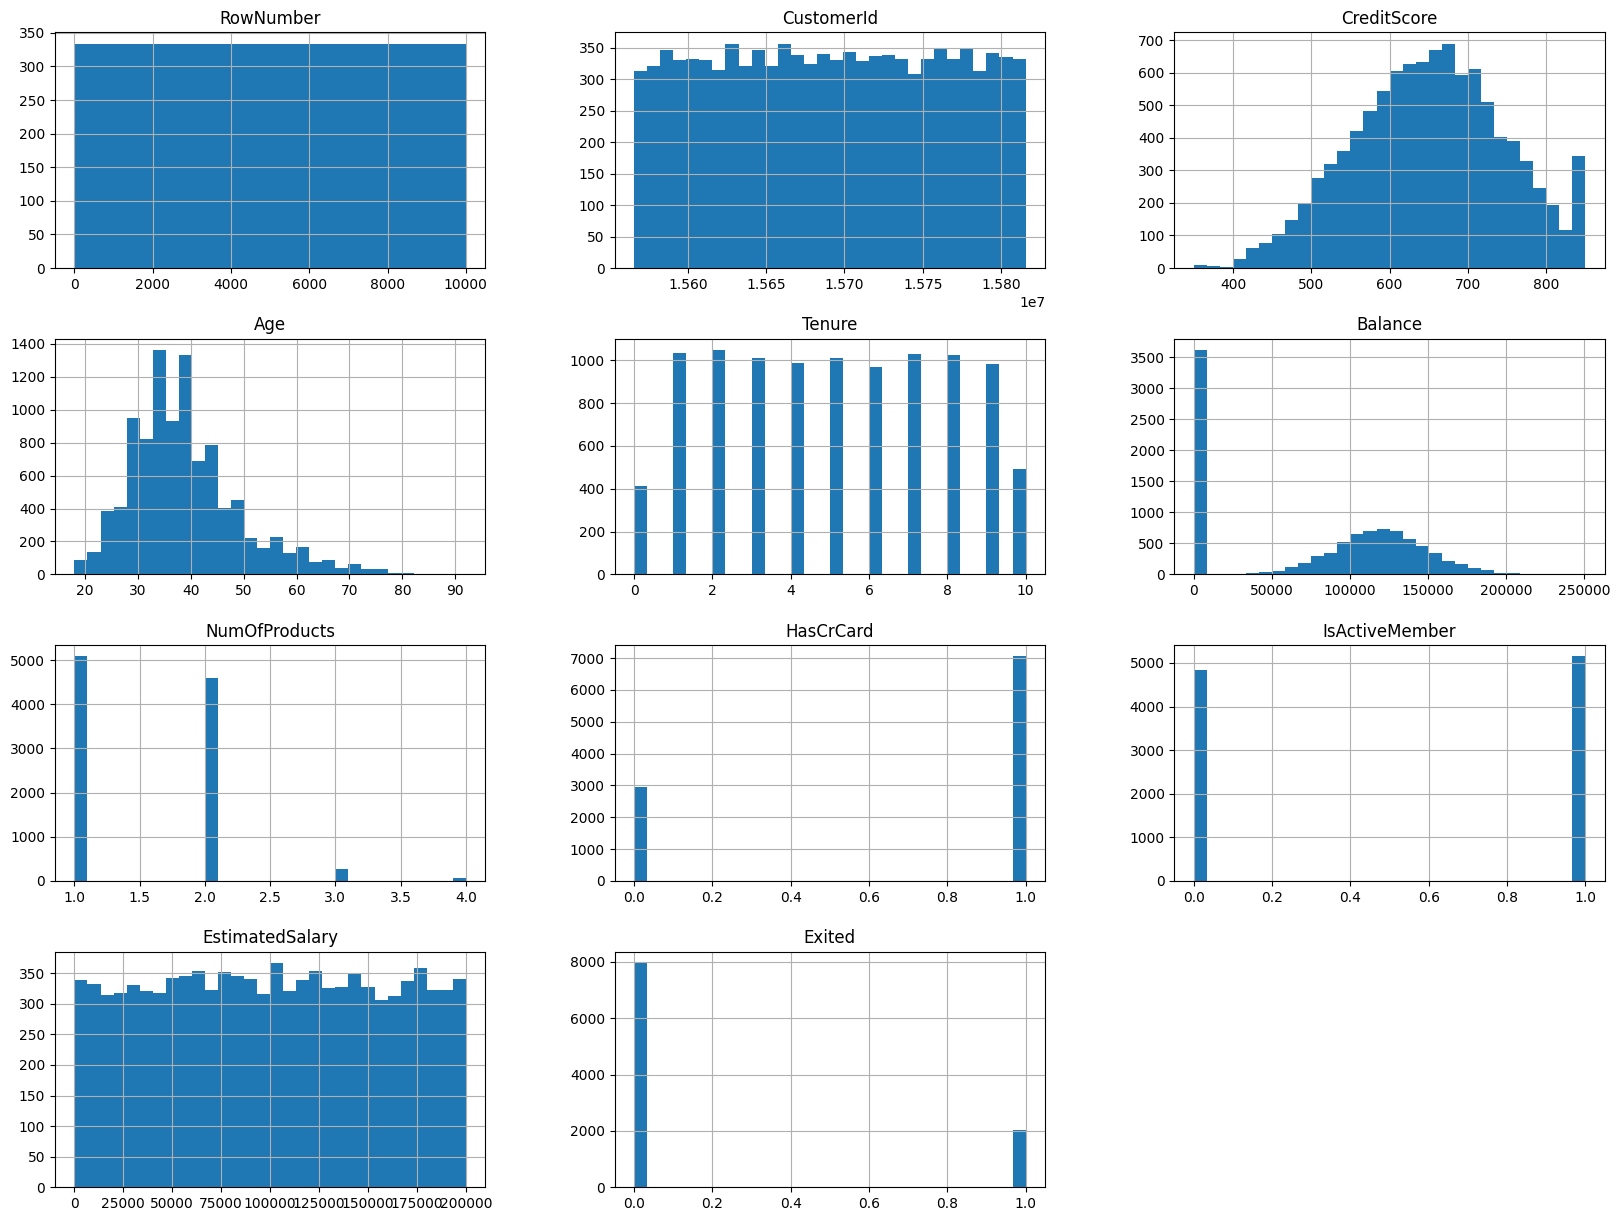

In [18]:
# Histograms for numerical column distributions

dataset.select_dtypes(include='number').hist(bins=30, figsize=(20, 15))
plt.show()

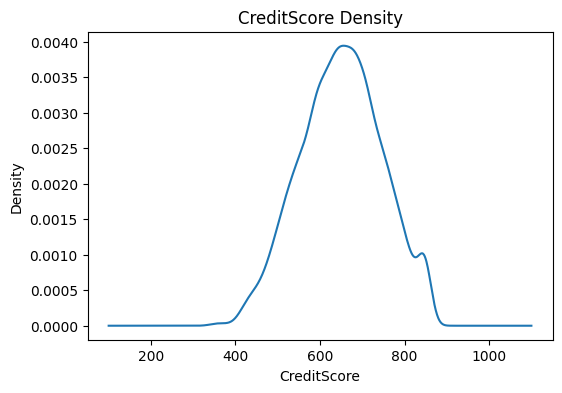

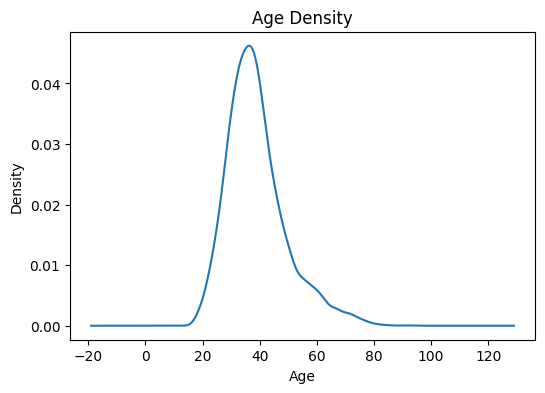

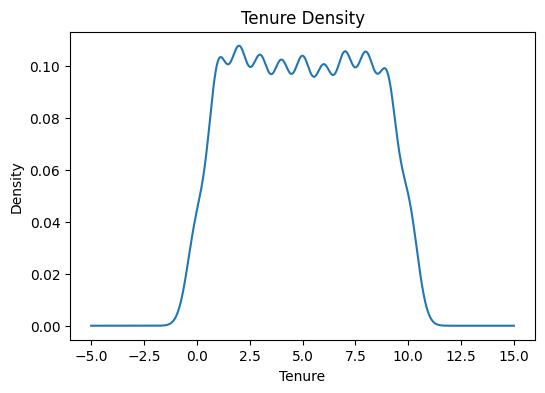

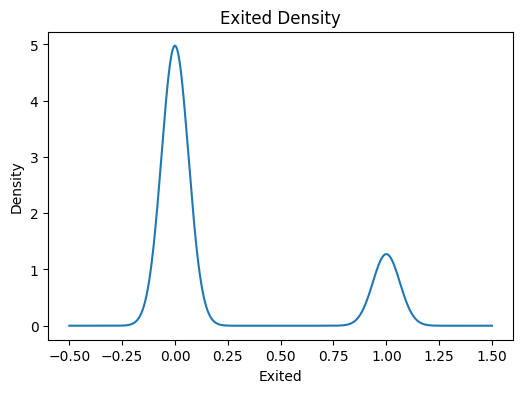

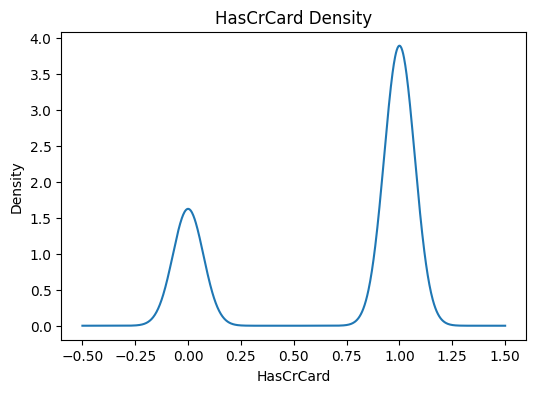

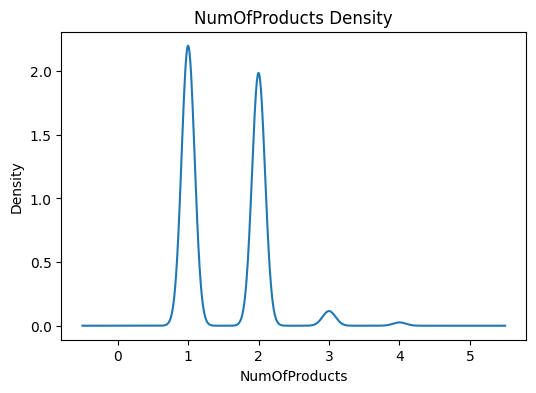

In [19]:
# density plots for numerical columns shows the distribution of data
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary','Exited','HasCrCard','NumOfProducts','Geography','Gender']
for col in columns_to_plot:
    if dataset[col].dtype == 'int64':
        plt.figure(figsize=(6, 4))
        dataset[col].plot.density()
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(col + ' Density')
        plt.show

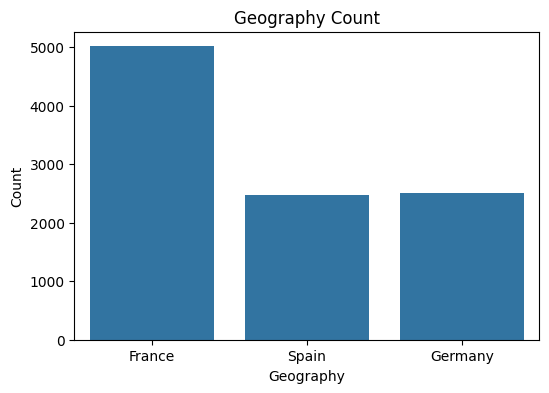

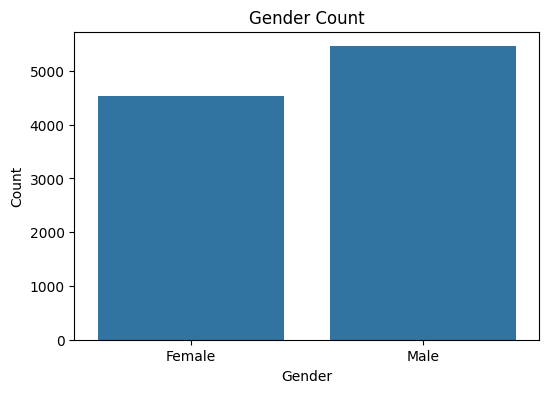

In [20]:
categorical_cols = dataset.select_dtypes(include='object').columns

for col in categorical_cols:
  if dataset[col].name != 'Surname':
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=dataset)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col + ' Count')
    plt.show()


# Separate dependent and independent variables

In [21]:
X = dataset.iloc[:, 3: -1].values # Ignore 1st three columns as they do not participate in predicting
y = dataset.iloc[:, -1].values

In [22]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(X)
print(y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10000, 10)
(10000,)
[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


# Data Preprocessing

## 1. Encoding categorical variables

### `OneHotEncoding` for variables with more than two categories.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ctInstance = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

# ctInstance.fit(X)

# Here transform or fit_transform returns same array-like object, but we need ndarray
# Convert the output to a NumPy array using np.array

X = np.array(ctInstance.fit_transform(X))


In [24]:
print(X[:10 , :])
# Observation - Encoded values get to the start of the array

[[1.0 0.0 0.0 619 'Female' 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 'Female' 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 'Female' 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 'Female' 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 'Female' 43 2 125510.82 1 1 1 79084.1]
 [0.0 0.0 1.0 645 'Male' 44 8 113755.78 2 1 0 149756.71]
 [1.0 0.0 0.0 822 'Male' 50 7 0.0 2 1 1 10062.8]
 [0.0 1.0 0.0 376 'Female' 29 4 115046.74 4 1 0 119346.88]
 [1.0 0.0 0.0 501 'Male' 44 4 142051.07 2 0 1 74940.5]
 [1.0 0.0 0.0 684 'Male' 27 2 134603.88 1 1 1 71725.73]]


#### `LabelEncoder` for varaibles with exactly two categories

In [25]:
from sklearn.preprocessing import LabelEncoder
leInstance = LabelEncoder()
leInstance.fit(X[: , 4])
X[: , 4] = leInstance.transform(X[: , 4])


In [26]:
print(X[:10, :])

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]
 [0.0 0.0 1.0 645 1 44 8 113755.78 2 1 0 149756.71]
 [1.0 0.0 0.0 822 1 50 7 0.0 2 1 1 10062.8]
 [0.0 1.0 0.0 376 0 29 4 115046.74 4 1 0 119346.88]
 [1.0 0.0 0.0 501 1 44 4 142051.07 2 0 1 74940.5]
 [1.0 0.0 0.0 684 1 27 2 134603.88 1 1 1 71725.73]]


## 2. Split training and test set

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


## 3. Feature Scaling

### Feature Scaling - `Scale training set and get the parameters and fit to the test set while evaluating.`

In [32]:
from sklearn.preprocessing import StandardScaler
scInstance = StandardScaler()
X_train = scInstance.fit_transform(X_train)

X_test = scInstance.transform(X_test) # Only transform, test_set based on parameters

In [33]:
print(X_train[:1, :])

[[-0.99725377  1.71773609 -0.57465595 -1.50603574 -1.08729708 -1.32582299
  -0.00584146  0.60645824  0.8071235   0.6493972   0.97921594  0.4657171 ]]


In [34]:
print(scInstance.mean_)
print(scInstance.scale_) # array containing standard deviation of each feature

[ 1.25593980e-16  6.43374243e-17  6.19865270e-16 -2.72647356e-16
 -8.91606233e-16  7.02216063e-18  2.25250374e-16 -7.33302308e-16
 -5.98271432e-17  6.93195501e-17 -4.30794289e-16 -3.85116938e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Artifical Neural Network Training and Predictions

### 1. Instantiate Sequential model - Fully connected NN

In [35]:
import tensorflow as tf

ann1 = tf.keras.models.Sequential()


### 2. Add fully connected layers using Dense class


In [36]:
# Adding 1st hidden layer and specifying shape
ann1.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(12,))) # 1st hidden layer with 6 units and 12 as share because of input features.

# adding more hidden layers
ann1.add(tf.keras.layers.Dense(units=4, activation='relu')) # hidden layer with 4 neurons

# adding output layer
ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # output layer with 1 neuron because of binary outcome -  exitied or not

### 3. Compiling the NN

#### Setting up necessary components for the NN, so that it could learn from data during training process.

We can set different optimizers that can influence the training process.

`learning_rate` is a hyperparameter

In [37]:
# Define the learning rate (e.g., 0.001)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

ann1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### 4. Training ANN on training set

In [38]:
ann1.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6052 - accuracy: 0.7205
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8023
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8194
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 0.4003 - accuracy: 0.8232
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3907 - accuracy: 0.8251
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8282
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.8282
Epoch 8/30
250/250 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8286
Epoch 9/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3722 - accuracy: 0.8286
Epoch 10/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8307

Accuracy on the traiting set during training process is about 86%

In [39]:
# Print the model summary
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. Making predictions on a single instance.

Does the customer with the following information leave the bank ?

Geography - France

Credit Score - 600

Gender - Female

Age - 42

Tenure - 2 years

Balance - 35000

Number of Products - 2

Does this customer has a credit card - Yes

Is this customer active member - Yes

Estimated Salary - 80000

Is this customer going to say good bye to the bank soon ?


In [40]:
# Sample data
data = [[1, 0, 0, 600, 0, 42, 2, 39000, 2, 1, 1, 100000]]

# Convert the list to a NumPy array
single_customer_inst = np.array(data)

# Print the NumPy array
print(single_customer_inst)
print(type(single_customer_inst))

[[     1      0      0    600      0     42      2  39000      2      1
       1 100000]]
<class 'numpy.ndarray'>


#### `The above instance need to be pre processed`
1. Missing values handling - No missing values
2. Encoding - Already `OneHotEncoded` for Geography and

3. labelEncoded for Gender

4. Scaling - To do

In [41]:
# Scaling
single_customer_inst = scInstance.transform(single_customer_inst)

In [42]:
print(single_customer_inst.shape)

(1, 12)


In [43]:
print(single_customer_inst[:,:])

[[ 1.00000000e+00 -6.43374243e-17 -6.19865270e-16  6.00000000e+02
   8.91606233e-16  4.20000000e+01  2.00000000e+00  3.90000000e+04
   2.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+05]]


In [44]:

# Predict method always expects 2D array - on single customer instance
single_customer_inst_yhat = ann1.predict(single_customer_inst)


1/1 [==============================] - 0s 139ms/step


In [45]:
# this will be the sigmoid activation value. So, threshold to get the binary value.

print(single_customer_inst_yhat)

[[1.]]


In [46]:
# threshold value is 0.5

print(single_customer_inst_yhat > 0.5)

[[ True]]


### 6. Making predictions on test set

In [47]:
# Prediction on X_test

y_predict = ann1.predict(X_test)
print(y_predict[:10])

y_pred_classes = (y_predict > 0.5).astype(int)

print(y_pred_classes[:10, :])



63/63 [==============================] - 0s 2ms/step
[[0.03826234]
 [0.6151168 ]
 [0.6585391 ]
 [0.0143868 ]
 [0.03738737]
 [0.7217721 ]
 [0.16558053]
 [0.78838664]
 [0.03336436]
 [0.7449079 ]]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [48]:
print(type(y_pred_classes))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [49]:
# Comparing Predicted values vs actual values

import pandas as pd

data = {'Predicted': y_pred_classes.flatten(), 'Actual': y_test}
df = pd.DataFrame(data)

# Print the DataFrame (showing columns with labels)
print(df)

      Predicted  Actual
0             0       0
1             1       1
2             1       1
3             0       0
4             0       0
...         ...     ...
1995          0       0
1996          0       0
1997          0       0
1998          0       0
1999          0       0

[2000 rows x 2 columns]


# Model Evaluation

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix = confusion_matrix(y_test, y_pred_classes)

print(confusion_matrix)

# Accuracy score

classification_accuracy = accuracy_score(y_test, y_pred_classes)

print(classification_accuracy)


[[1555   39]
 [ 248  158]]
0.8565


### Visualizing Confusion matrix

 Values in the confusion matrix

```
                    Predicted Negative    Predicted Positive
Actual Negative         12 (TN)                3 (FP)
Actual Positive         1 (FN)                14 (TP)



Here, the matrix clearly shows:

12 True Negatives (TN): Correctly predicted negatives.
3 False Positives (FP): Incorrectly predicted positives.
1 False Negative (FN): Incorrectly predicted negatives.
14 True Positives (TP): Correctly predicted positives.

```


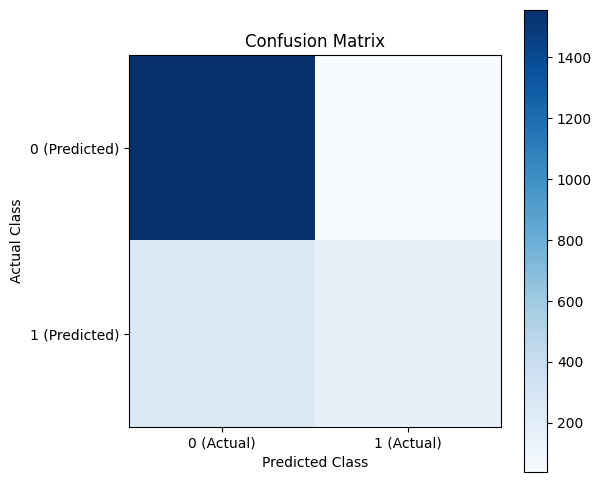

In [156]:
# Visualize the confusion matrix (optional)
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
# Explanation of labels (0 and 1 are used)
plt.xticks(range(2), ['0 (Actual)', '1 (Actual)'])  # Actual class labels
plt.yticks(range(2), ['0 (Predicted)', '1 (Predicted)'])  # Predicted class labels

plt.grid(False)
plt.show()

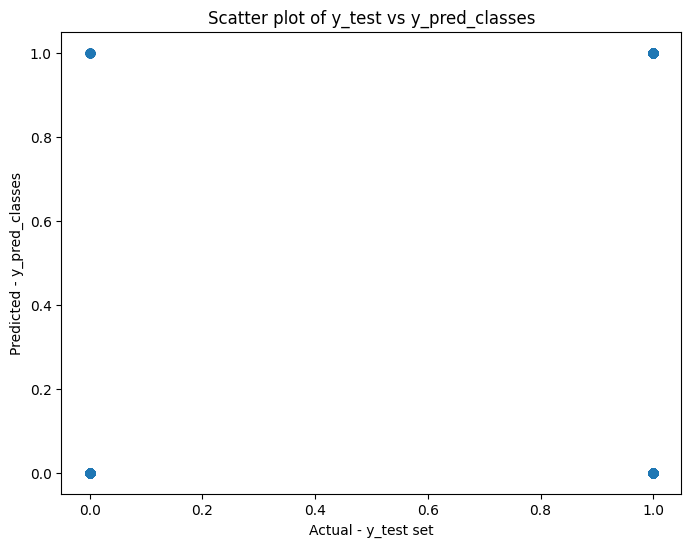

In [155]:
### Scatter plot of y_test vs y_pred_classes

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_classes)
plt.xlabel('Actual - y_test set')
plt.ylabel( 'Predicted - y_pred_classes')
plt.title('Scatter plot of y_test vs y_pred_classes')
plt.show()